
# 🚗 Exploratory Data Analysis on the Auto MPG Dataset

## 📌 Project Overview
This project analyzes the classic **Auto MPG dataset** from the UCI Machine Learning Repository to uncover patterns in fuel efficiency and vehicle characteristics.  
The dataset contains specifications for 398 cars manufactured between 1970 and 1982, including:
- Miles per gallon (mpg)
- Number of cylinders
- Engine displacement
- Horsepower
- Weight
- Acceleration
- Model year
- Origin

### 🎯 Objectives
1. Understand the distribution of vehicle attributes.
2. Identify relationships between engine characteristics and fuel efficiency.
3. Explore trends over time, including the impact of the 1973 oil crisis.
4. Prepare the dataset for potential predictive modeling.

### 📂 Dataset Source
[UCI Machine Learning Repository – Auto MPG Dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

---


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [154]:
#Loading the dataset
data=pd.read_csv("./Dataset/auto-mpg.csv")

In [155]:
#Finding Diamensions
np.shape(data)

(398, 9)

In [156]:
#Finding Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [157]:
#Finding Summary
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Understanding Data 

In [158]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [159]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


Visualizing the Data

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

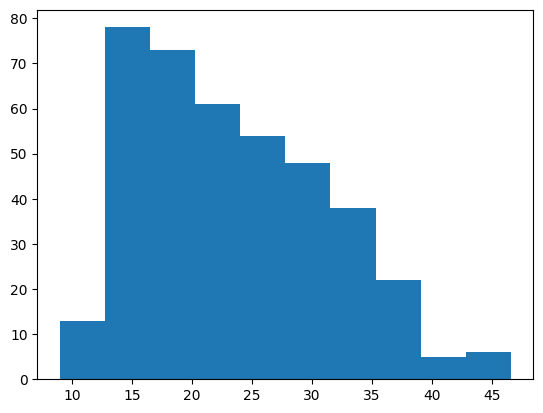

In [160]:
#Histogram for plt
plt.hist(data['mpg'])

Comparing plt.hist and sns.histplot (represtation wise)

<Axes: xlabel='mpg', ylabel='Count'>

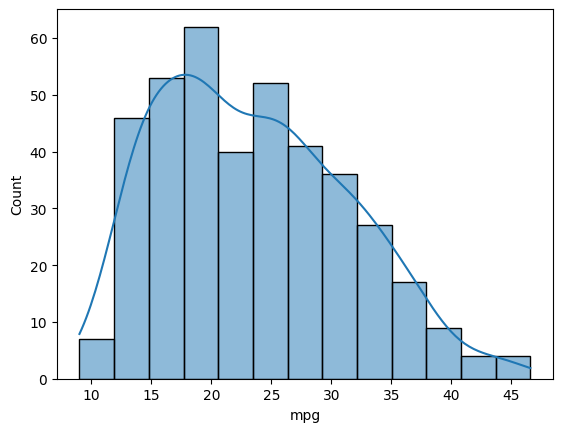

In [161]:
sns.histplot(x=data['mpg'],kde=True)

The borders of sns.histplot makes it look more good and KDE is definitely a plus

Observation: The Density function is skewed towards the right(longer tail to the right).
Most cars have lower normalized mpg values (towards 0.2–0.4), while a smaller number have much higher mpg (towards 0.8–1.0).

Conclusion: This skewness means fuel-efficient cars are less common in this dataset.




In [162]:
data['cylinders']=pd.Categorical(data['cylinders'])

<Axes: xlabel='cylinders', ylabel='count'>

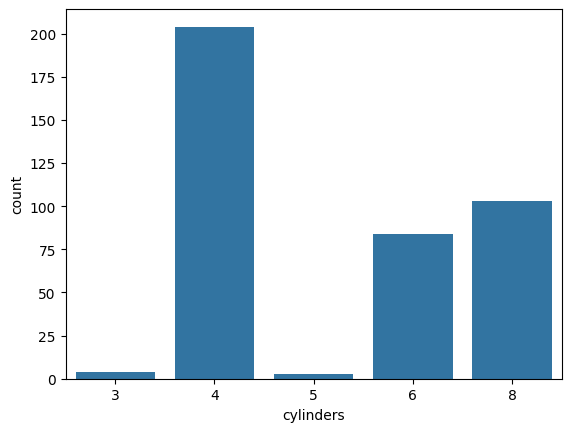

In [163]:
sns.countplot(x=data['cylinders'])

Observation 1: Four-cylinder engines dominate in the dataset.

Inference: This likely reflects a large presence of smaller cars in the data. 


Observation 2: Even-number configurations (4, 6, and 8) are far more common than odd-number ones (3 and 5).

Inference: This aligns with typical automotive engineering practices, as even-cylinder engines are easier to balance and manufacture at scale.


Observation 3: Despite the dominance of 4-cylinders, 8-cylinder cars still have a notable presence

Inference: This trend indicates that high-performance or heavy-duty vehicles remained popular for certain markets.

<Axes: xlabel='displacement', ylabel='Count'>

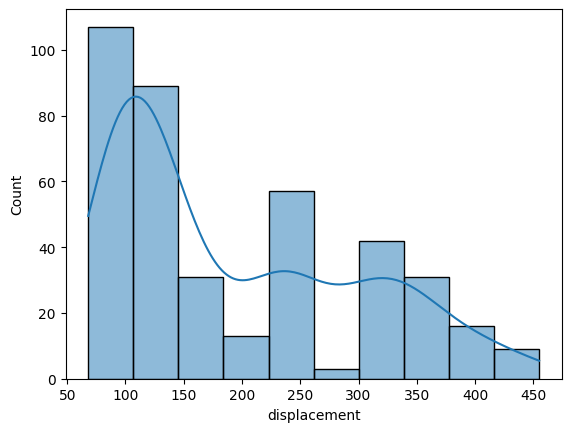

In [164]:
sns.histplot(data["displacement"],kde=True)

1. Observation: The highest concentration of vehicles have normalized displacement values between 0.0 and 0.2.
Inference: Most cars in the dataset have small engine sizes, likely optimized for fuel efficiency.

2. Observation: The frequency of vehicles decreases steadily as displacement increases beyond 0.2.
Inference: Larger engine sizes are less common, possibly due to higher fuel consumption or changing consumer preferences during the dataset period.

3. Observation: A smaller secondary peak appears in the mid-range (~0.4–0.6).
Inference: There is a subgroup of vehicles with moderate engine sizes, which may correspond to mid-sized cars or specific market segments.


<Axes: xlabel='horsepower', ylabel='Count'>

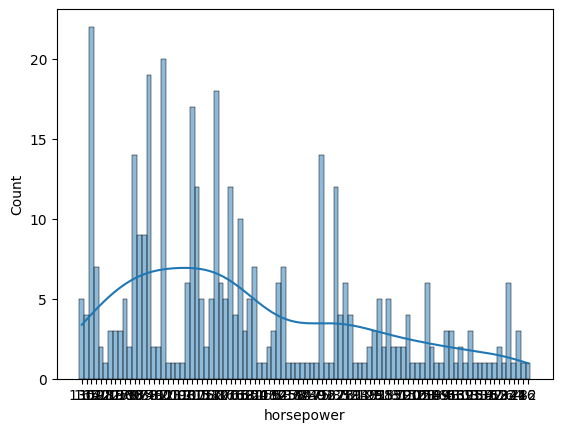

In [165]:
sns.histplot(data['horsepower'],kde=True)

Observation: The distribution is right-skewed, with a long tail towards higher horsepower values.

Inference: Most vehicles in the dataset have lower horsepower, with fewer high-performance cars.

Observation: There is a smaller secondary peak around ~0.55 normalized horsepower.

Inference: This may indicate a subgroup of more powerful mid- to high-performance vehicles in the dataset.

Observation: Very few entries exist above 0.8 normalized horsepower.

Inference: Extremely high-horsepower cars were rare, probably limited to performance or specialty models.



<Axes: xlabel='weight', ylabel='Count'>

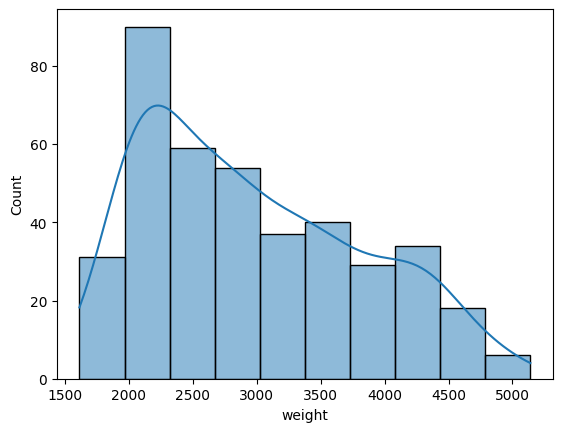

In [166]:
sns.histplot(data['weight'],kde=True)

Observation: The distribution is right-skewed, with most vehicles concentrated at the lower weight range.

Inference: Smaller and lighter cars are more common in the dataset,

Observation: Counts gradually decline as weight increases, but heavier cars are still present throughout the range.

Inference: While lighter cars dominate, heavier vehicles (likely trucks or large sedans) still represent a notable portion of the market.

<Axes: xlabel='acceleration', ylabel='Count'>

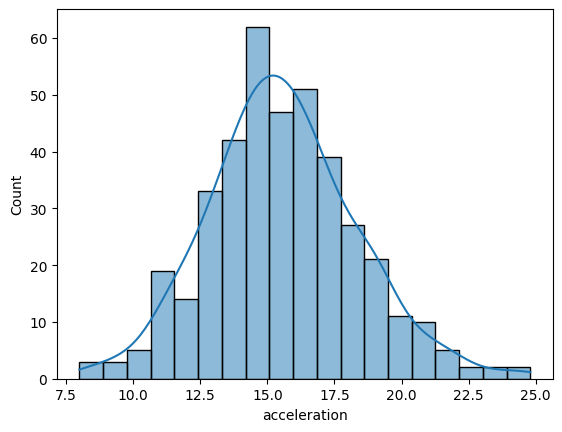

In [167]:
sns.histplot(data['acceleration'],kde=True)

Observation: The distribution is approximately symmetric and bell-shaped, peaking around 0.45–0.55 (normalized scale).

Inference: Most vehicles have moderate acceleration values, with fewer cars having either very low or very high acceleration.

Observation: Acceleration values span the entire normalized range (0–1), but frequencies drop sharply toward both extremes.

Inference: Although a variety of acceleration capabilities exists(Due to varied hp), most vehicles cluster around average values — likely due to common engineering targets, safety regulations, and consumer expectations for balanced performance.


In [168]:
data['model_year']=pd.Categorical(data['model_year'])

KeyError: 'model_year'

<Axes: xlabel='model_year', ylabel='count'>

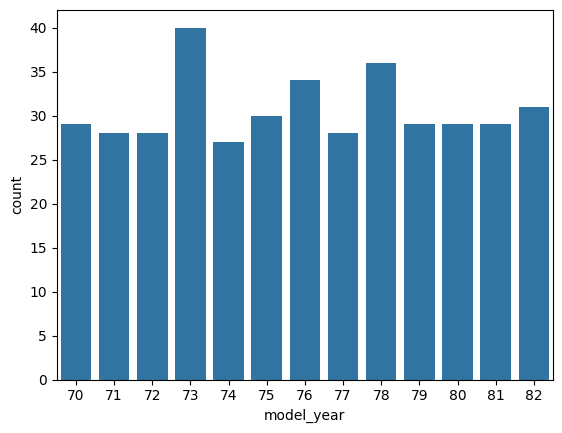

In [ ]:
sns.countplot(x=data['model_year'])

Observation: The number of cars is fairly consistent across model years, with most years having around 28–32 entries.
Inference: The dataset is relatively balanced in terms of temporal representation

Observation: The lowest count is in 1974, with noticeably fewer vehicles compared to other years.

Inference: This drop likely reflects the aftermath of the 1973 oil crisis, when fuel shortages, economic uncertainty, and shifting consumer demand led to reduced vehicle production and sales.

In [ ]:
data['origin']=pd.Categorical(data['origin'])

<Axes: xlabel='origin', ylabel='count'>

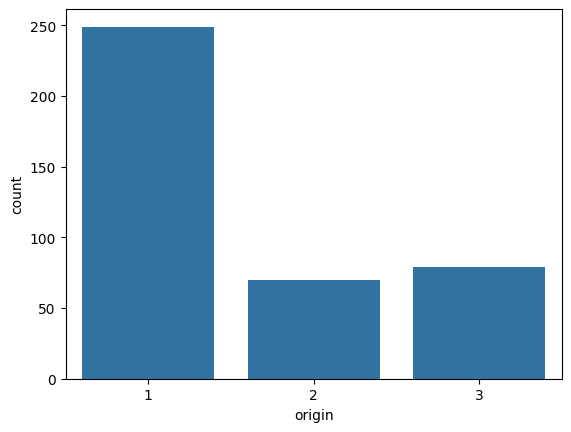

In [ ]:
sns.countplot(x=data['origin'])

Observation: The majority of vehicles (~250) have an origin code of 1.

Inference: Most cars in the dataset are from the United States.

Observation: Origin 3 (around 80 vehicles) is slightly more common than origin 2 (around 70 vehicles).

Inference: Japanese cars (origin 3) are more represented in the dataset than European cars (origin 2), possibly due to their popularity during the fuel efficiency shift in the late 1970s.

Observation: There is a large gap between the number of U.S. vehicles and those from other regions.

Inference: The dataset is skewed toward U.S.-manufactured vehicles, which should be considered when interpreting results or building models.

Outlier Detection and Treatment

Outlier test in mpg

<Axes: xlabel='mpg'>

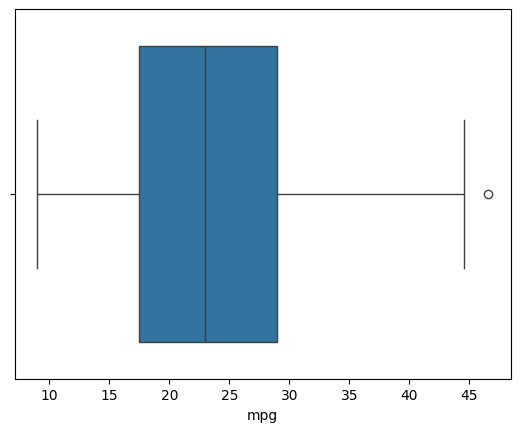

In [ ]:
sns.boxplot(x=data['mpg'])

In [ ]:
def find_Intial_outliers(data):
  outliers=[]
  threshold=3
  #Threshold = 3 means that the maximum limit of permissible elements is in range -3sigma to +3sigma
  mean=np.mean(data)
  std=np.std(data)
  #std means standard deviation
  #we will find the z score for each valu and we wil compare the z score with threshold to see if it is an outlier
  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

Initial test: Any value>3sigma or < -3sigma is considered outlier

In [ ]:
print(find_Intial_outliers(data['mpg']))

[]


Okay, so this test failed
So we the Interquartile Range (IQR) method

In [ ]:
q1=np.percentile(data['mpg'],25)
q3=np.percentile(data['mpg'],75)
iqr=q3-q1

In [ ]:
iqr

11.5

In [ ]:
lower_fence=q1-1.5*iqr
print(lower_fence)

0.25


In [ ]:
upper_fence=q3+1.5*iqr
print(upper_fence)

46.25


In [ ]:
for i in data['mpg']:
    if(i<lower_fence or i>upper_fence):
        print(i)


46.6


So, we have finally got the outlier.

Let's remove it and see the boxplot
But we can't actually delete it because it's not an array but a table.

So we replace it with mean.

In [ ]:
data['mpg'].replace(46.6,data['mpg'].mean(),inplace=True)


Now let's check with Boxplot

<Axes: xlabel='mpg'>

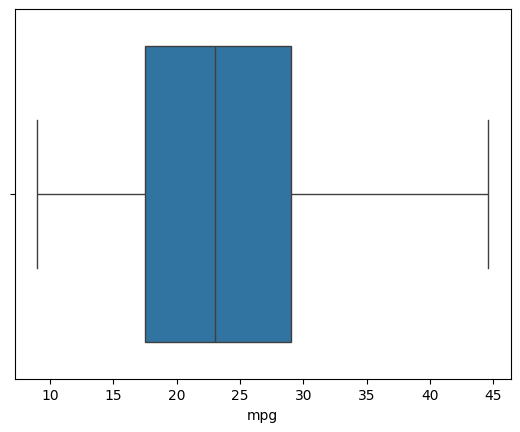

In [ ]:
sns.boxplot(x=data['mpg'])

Finally, the outlier is treated.

Now let's make a function so that we can reuse that for all the continuous variables

In [ ]:
def iqr_test(data):
    outlier=[]
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    for i in data:
        if(i<lower_fence or i>upper_fence):
            outlier.append(i)
    return outlier



Now let's check for other continuous varaibles

Outlier check and treatment for Displacement

<Axes: xlabel='displacement'>

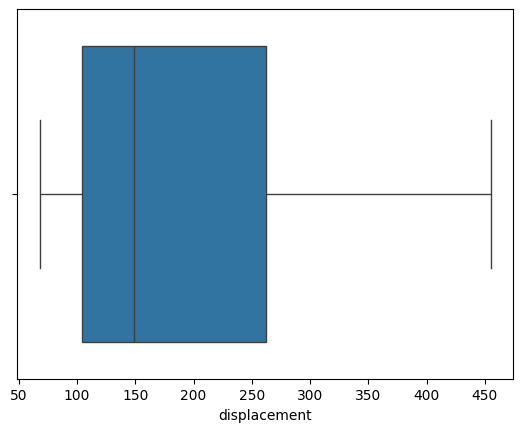

In [ ]:
sns.boxplot(x=data['displacement'])

No outliers in Displacement

Outlier Treatment in Horsepower

<Axes: xlabel='horsepower'>

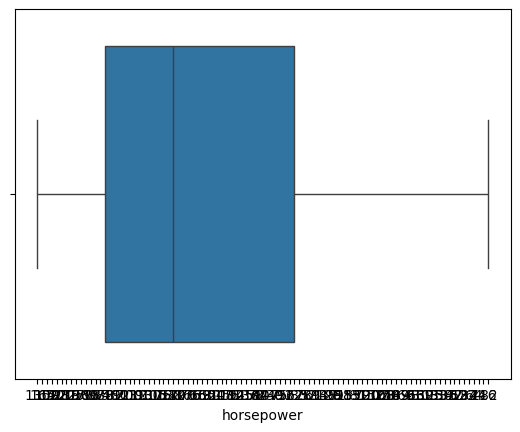

In [ ]:
sns.boxplot(x=data['horsepower'])

No outlier in Horsepower as well

Now let's check for Weight

<Axes: xlabel='weight'>

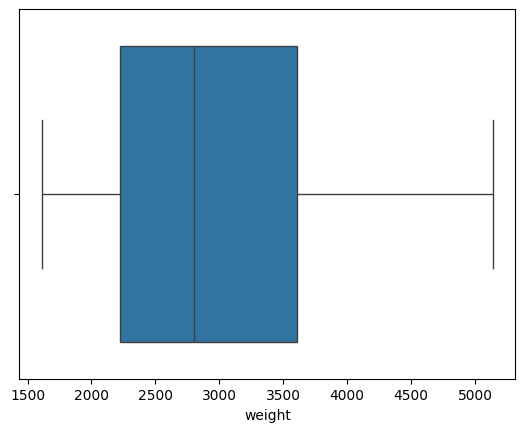

In [ ]:
sns.boxplot(x=data['weight'])

No outlier in Weight

Outlier detection in Acceleration

<Axes: xlabel='acceleration'>

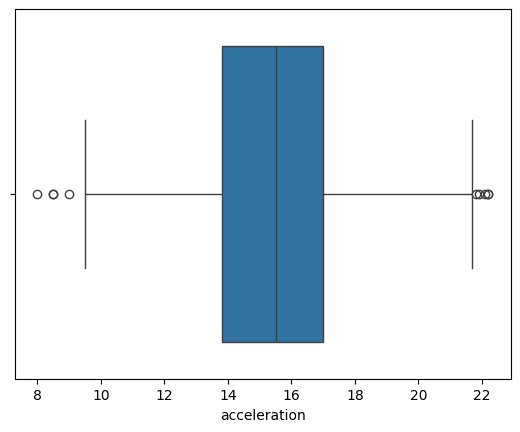

In [ ]:
sns.boxplot(x=data['acceleration'])

In [ ]:
print(find_Intial_outliers(data['acceleration']))

[24.8, 24.6, 24.8, 24.6, 23.7, 23.5, 23.5, 23.5, 24.8, 24.6]


In [ ]:
#Removing initial outliers
temp=[]
temp=find_Intial_outliers(data['acceleration'])
for i in temp:
    data['acceleration'].replace(i,data['acceleration'].mean(),inplace=True)

In [ ]:
print(iqr_test(data['acceleration']))

[9.0, 8.5, 8.5, 8.0, 22.2, 22.1, 21.9, 22.2, 21.8]


In [ ]:
temp=[]
temp=iqr_test(data['acceleration'])
for i in temp:
    data['acceleration'].replace(i,data['acceleration'].mean(),inplace=True)

<Axes: xlabel='acceleration'>

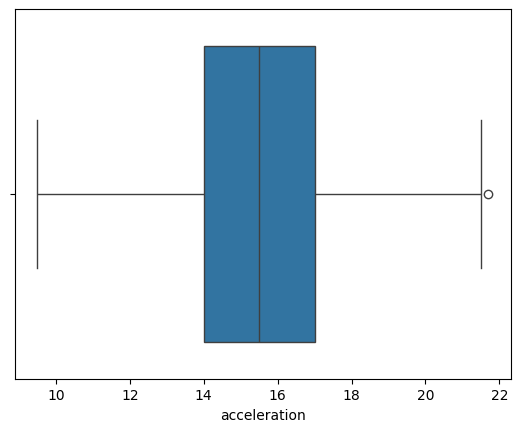

In [ ]:
sns.boxplot(x=data['acceleration'])

Okay one outlier still remaining

let's check with iqr test once more

In [ ]:
print(iqr_test(data['acceleration']))

[21.7]


In [ ]:
data['acceleration'].replace(21.7,data['acceleration'].mean(),inplace=True)

<Axes: xlabel='acceleration'>

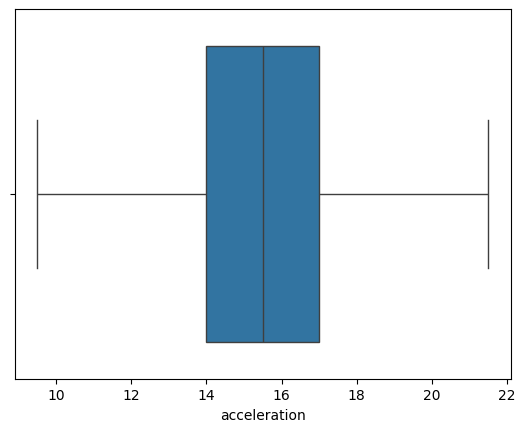

In [ ]:
sns.boxplot(x=data['acceleration'])

Finally, the outlier is treated.

Thus all continuous variable are treated.

Interested contributors kindly check if my outlier checking is correct for acceleration because even after first iqr_test there was one outlier which had to be removed by repeating iqr_test for second time. But I feel that this shouldn't have happened as the outlier should have been detected and removed in the first go

Now let's check if the dataset has any "na" variables. If so treat them.

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
model_year      0
dtype: int64

No "na" variables

Standardization of data

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_year
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,70
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,70
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,70
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,70
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,70


In [ ]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data[['mpg','displacement','horsepower','weight','acceleration']]=scaler.fit_transform(data[['mpg','displacement','horsepower','weight','acceleration']])

ValueError: could not convert string to float: '?'

The error in the previous standardization step was a ValueError. This happened because the horsepower column contains non-numeric values, specifically the character '?'. The MinMaxScaler can only work with numerical data. We'll need to handle these non-numeric values before we can standardize the column.
'?' is likely a mistake in the dataset

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

This line attempts to convert the horsepower column to a numeric data type.

pd.to_numeric() is a pandas function for converting a column to a numeric type.

data['horsepower'] selects the 'horsepower' column.

errors='coerce' is important here. 

If pandas encounters any value in the column that cannot be converted to a number (like the '?' we saw), 
it will replace that value with NaN (Not a Number), which is a standard way to represent missing values in pandas.

In [ ]:
#This line handles the missing values (NaN) that were created in the previous step.
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

Now let's retry standardization

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data[['mpg','displacement','horsepower','weight','acceleration']]=scaler.fit_transform(data[['mpg','displacement','horsepower','weight','acceleration']])

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_year
0,0.252809,8,0.617571,0.456522,0.536150,0.208333,70,1,chevrolet chevelle malibu,70
1,0.168539,8,0.728682,0.646739,0.589736,0.166667,70,1,buick skylark 320,70
2,0.252809,8,0.645995,0.565217,0.516870,0.125000,70,1,plymouth satellite,70
3,0.196629,8,0.609819,0.565217,0.516019,0.208333,70,1,amc rebel sst,70
4,0.224719,8,0.604651,0.510870,0.520556,0.083333,70,1,ford torino,70


Now the full data is standardized

Conclusion & Key Insights:
1. Fuel Efficiency Trends
    - The dataset shows a wide variation in MPG, with most cars falling in the lower range.

    - Over the years, there’s a clear shift toward better fuel efficiency, likely influenced by the oil crisis and environmental regulations.

2. Engine Size & Cylinders

    - 4-cylinder vehicles dominate the dataset and generally have higher MPG.

    - Larger engines (6 and 8 cylinders) are less fuel-efficient and became less common after the mid-1970s.

3. Horsepower & Weight Relationship

    - Both horsepower and weight are negatively correlated with MPG — heavier, more powerful cars tend to consume more fuel.

4. Acceleration

    - Acceleration values are mostly centered around average performance, with fewer extremes. This suggests manufacturers aimed for a balanced performance standard regardless of horsepower range.

5. Regional Differences

    - U.S. cars (origin 1) dominate the dataset but generally have lower MPG than Japanese (origin 3) or European (origin 2) cars.

    - Japanese vehicles consistently show higher fuel efficiency, which may have contributed to their increasing popularity post-oil crisis.